# MLBA homework2

In [64]:
# Put the package you need to use here
using Random
using Plots
using LinearAlgebra
using Statistics

## Q1 

plot restaurant with different color

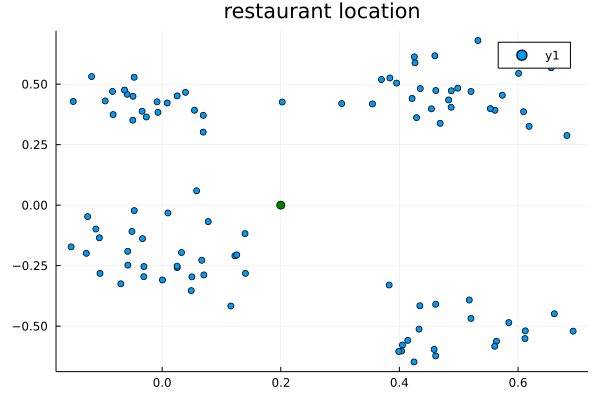

In [26]:
Random.seed!(8)
customer = vcat( [ [0, -0.2] + 0.1*randn(2) for i = 1:30 ],
[ [0.5, 0.5] + 0.1*randn(2) for i = 1:30 ],
[ [0.5, -0.5] + 0.1*randn(2) for i = 1:20 ],
[ [0, 0.4] + 0.06* randn(2) for i = 1:20])
restaurant = [0.2, 0.0]
scatter([customer[i][1] for i in 1:100], [customer[i][2] for i in 1:100], title = "restaurant location")
scatter!([0.2], [0], color = "green", label = "", markersize = 5)

## Q2 

a. What is are all distances (in terms of 2-norm) between Chelsea's restaurant and
all her customers?

b. Who is the closest customer to Chelsea's restaurant in terms of 2-norm?
* 28th
c. 1-norm in R2 is calculated as ||x||1 = |x1| + |x2| for x= (x1, x2), what is the farthest
customer to Chelsea's restaurant in terms of 1-norm?
* 40th
d. Are the 5 closest customers to Chelsea'srestaurant calculated using 1-normand
2-norm the same?
* not exactly

In [50]:
# a.
distance = zeros(0)
for i in 1:100
    distance = append!(distance, norm(customer[i] - restaurant))
end
println(distance)

# b.
println(argmin(distance))

# c.
one_norm = zeros(0)
for i in 1:100
    diff = abs(customer[i][1]-restaurant[1]) + abs(customer[i][2]-restaurant[2])
    one_norm = append!(one_norm, diff)
end
println(argmax(one_norm))

# d. 
for i in 1: length(distance)
    if distance[i] in sort(distance)[1:5]
        println("index ",i, " is among the top5 closest customers in term of 2-D norm" )
    end
end
println("\n")
for i in 1: length(one_norm)
    if one_norm[i] in sort(one_norm)[1:5]
        println("index ",i, " is among the top5 closest customers in term of 1-D norm" )
    end
end



[0.4251658770158571, 0.2575082460981635, 0.13998762216797075, 0.1537935611012896, 0.4151452347724467, 0.31605155214807695, 0.31164317443894646, 0.3342592293506981, 0.3290079324937733, 0.342939123966735, 0.2481056996215742, 0.39320443630899427, 0.375069681898778, 0.19297601764658182, 0.38409381313905167, 0.2734266993004055, 0.38349034121491765, 0.2637563918658197, 0.3207655551693519, 0.3320158778986723, 0.2709810708422702, 0.32696893020385737, 0.3068012337569479, 0.22327071467080087, 0.2184810806971324, 0.42218719671235483, 0.3678975499296759, 0.1321191317573686, 0.2882167064457779, 0.3575165932370559, 0.5330982579452384, 0.496129757333776, 0.532954857035075, 0.43221347628613005, 0.5532466513361851, 0.5408978950040546, 0.7571878826832577, 0.5360988134636208, 0.5681091913611711, 0.7832723799058409, 0.55678313486188, 0.5617810187074119, 0.5187790084245588, 0.6698174409039259, 0.4720984804370566, 0.5687338815987244, 0.43189345236097315, 0.49354559915967633, 0.6763237762341303, 0.5462718450

## Q3 

plot the linear regression

farthest?
* 81th

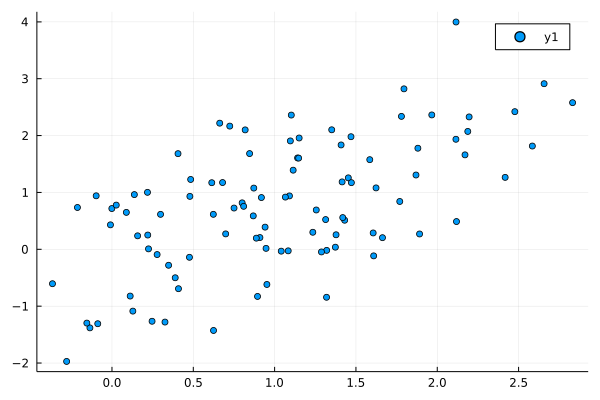

In [65]:
Random.seed!(8)
y = randn(100)
Random.seed!(8)
quality = y * 0.5 + rand(100) * 0.1
Random.seed!(10)
nutrition = y * 0.1 + rand(100) * 0.2
price = quality * 1 + nutrition * 0.1 + rand(100) * 2

beta = [0.5, 7.1]; v = 0.1;
price_hat = v .+ beta[1] * quality + beta[2] * nutrition;
scatter(price, price_hat)



In [66]:
# calculate 2-D norm of 2 1-dim vector: price and price_hat
diff = zeros(0)
for i in 1: length(price)
    diff = append!(diff, sqrt((price[i]-price_hat[i])^2))
end
argmax(diff)

81

## Q4 k-means

a. find 3 clustering center
* [0.20301988976085344, -0.33544409796439917], [-0.015830756934752485, 0.4069005556488234], [0.49401564790491076, 0.4698524061491968]
b. plot them
c. turn measurement of distance from 2-D norm to 1-D norm
* they looks different
d.Do you think 3 is a good clustering number? Why?
* I guess 4 would be a practical number since visually we can observe that data is sited among 4 corners in a 2-D plane and different measure of distance makes difference.

In [67]:
function kmeansfunction(x, k; maxiters = 100, tol = 1e-5)  # k-groups
    N = length(x) 
    n = length(x[1]) # dim
    distances = zeros(N)  
    reps = [zeros(n) for j=1:k]  
    
    # The initial assignment is chosen randomly.
    assignment = [ rand(1:k) for i in 1:N ]
    Jprevious = Inf  # used in stopping condition
    for iter = 1:maxiters
        # Cluster j representative is average of points in cluster j.
        for j = 1:k
            group = [i for i=1:N if assignment[i] == j]
            reps[j] = sum(x[group]) / length(group);
        end;
        # For each x[i], find distance to the nearest representative and its group index.
        for i = 1:N
            (distances[i], assignment[i]) =
            findmin([norm(x[i] - reps[j]) for j = 1:k])
        end;
        # Compute clustering objective.
        J = norm(distances)^2 /  N # distance to the cluster center ???
        
        # Show progress and terminate if J stopped decreasing.
        println("Iteration ", iter, ": Jclust = ", J, ".")
        if iter > 1 && abs(J - Jprevious) < tol * J
            return assignment, reps
        end
        Jprevious = J
    end
end
assignment, reps = kmeansfunction(customer, 3)

Iteration 1: Jclust = 0.19558951753303855.
Iteration 2: Jclust = 0.07725528037217712.
Iteration 3: Jclust = 0.06303224635146905.
Iteration 4: Jclust = 0.0581635479598526.
Iteration 5: Jclust = 0.058106821133650656.
Iteration 6: Jclust = 0.058106821133650656.


([1, 1, 1, 2, 1, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [[0.20301988976085344, -0.33544409796439917], [-0.015830756934752485, 0.4069005556488234], [0.49401564790491076, 0.4698524061491968]])

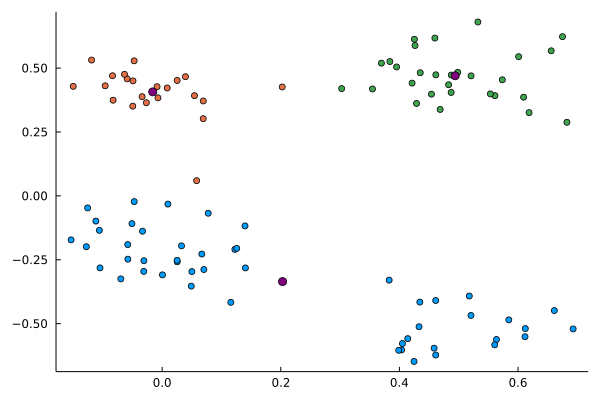

In [72]:
k = 3
N = length(customer)
grps  = [[customer[i] for i=1:N if assignment[i] == j] for j=1:k]
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]])
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]])
scatter!([c[1] for c in grps[3]], [c[2] for c in grps[3]])
plot!(legend = false, grid = false)
scatter!([0.20301988976085344, -0.015830756934752485, 0.49401564790491076], [-0.33544409796439917, 0.4069005556488234, 0.4698524061491968], color = "purple", label = "", markersize = 5)

Iteration 1: Jclust = 31.144902596822266.
Iteration 2: Jclust = 6.766857159062242.
Iteration 3: Jclust = 6.732678697764718.
Iteration 4: Jclust = 6.732678697764718.


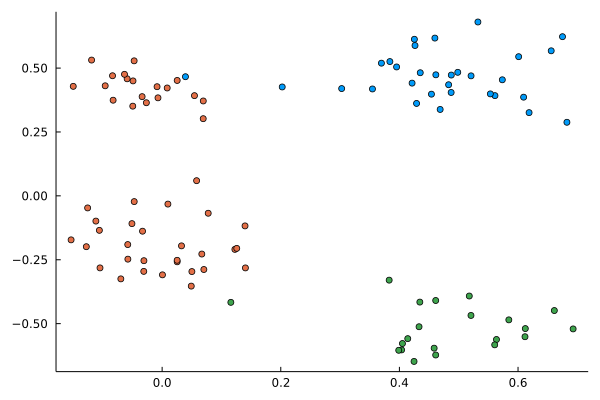

In [83]:
function cal_one_norm(v)
    ans = 0
    for i in 1: length(v)
        ans += abs(v[i])
    end
    return ans
end
function kmeansfunction(x, k; maxiters = 100, tol = 1e-5)  # k-groups
    N = length(x) 
    n = length(x[1]) # dim
    distances = zeros(N)  
    reps = [zeros(n) for j=1:k]  
    
    # The initial assignment is chosen randomly.
    assignment = [ rand(1:k) for i in 1:N ]
    Jprevious = Inf  # used in stopping condition
    for iter = 1:maxiters
        # Cluster j representative is average of points in cluster j.
        for j = 1:k
            group = [i for i=1:N if assignment[i] == j]
            reps[j] = sum(x[group]) / length(group);
        end;
        # For each x[i], find distance to the nearest representative and its group index.
        for i = 1:N
            (distances[i], assignment[i]) =
            findmin([cal_one_norm(x[i] - reps[j]) for j = 1:k])
        end;
        # Compute clustering objective.
        J = cal_one_norm(distances)^2 /  N # distance to the cluster center ???
        
        # Show progress and terminate if J stopped decreasing.
        println("Iteration ", iter, ": Jclust = ", J, ".")
        if iter > 1 && abs(J - Jprevious) < tol * J
            return assignment, reps
        end
        Jprevious = J
    end
end
assignment, reps = kmeansfunction(customer, 3)
k = 3
N = length(customer)
grps  = [[customer[i] for i=1:N if assignment[i] == j] for j=1:k]
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]])
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]])
scatter!([c[1] for c in grps[3]], [c[2] for c in grps[3]])
plot!(legend = false, grid = false)
# scatter!([0.20301988976085344, -0.015830756934752485, 0.49401564790491076], [-0.33544409796439917, 0.4069005556488234, 0.4698524061491968], color = "purple", label = "", markersize = 5)


## Q5 

Define a function named "Gram_Schmidt"
input : array with vectors
output: orthonormal set of vectors, if vectors are l.i.
        “Vectors are linearly dependent.”, if vectors are l.d.

In [94]:
function gram_schmidt(a; tol = 1e-10)
    q = []
    for i = 1:length(a)
        qtilde = a[i]
        for j = 1:i-1
            qtilde -= (q[j]'*a[i]) * q[j]
        end
        
        if norm(qtilde) < tol
            println("Vectors are linearly dependent.")
            # return q
            return ""
        end
        push!(q, qtilde/norm(qtilde))
    end;
    return q
end

a = [ [-1, 1, -1, 1], [-1, 3, -1, 3], [1, 3, 5, 7] ]
gram_schmidt(a)
b = [ a[1], a[2], 1.3*a[1] + 0.5*a[2] ]
gram_schmidt(b)

Vectors are linearly dependent.


""